In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Iris dataset

In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
iris_classes = iris_dataset.target_names

In [3]:
df = pd.DataFrame(np.vstack((X.T,y)).T, columns = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)', 'Kind'])

# Replace the target labels with their actual names
for i, kind_i_name in enumerate(iris_classes):
    df['Kind'].loc[(df['Kind'] == i)] = kind_i_name

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Kind
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


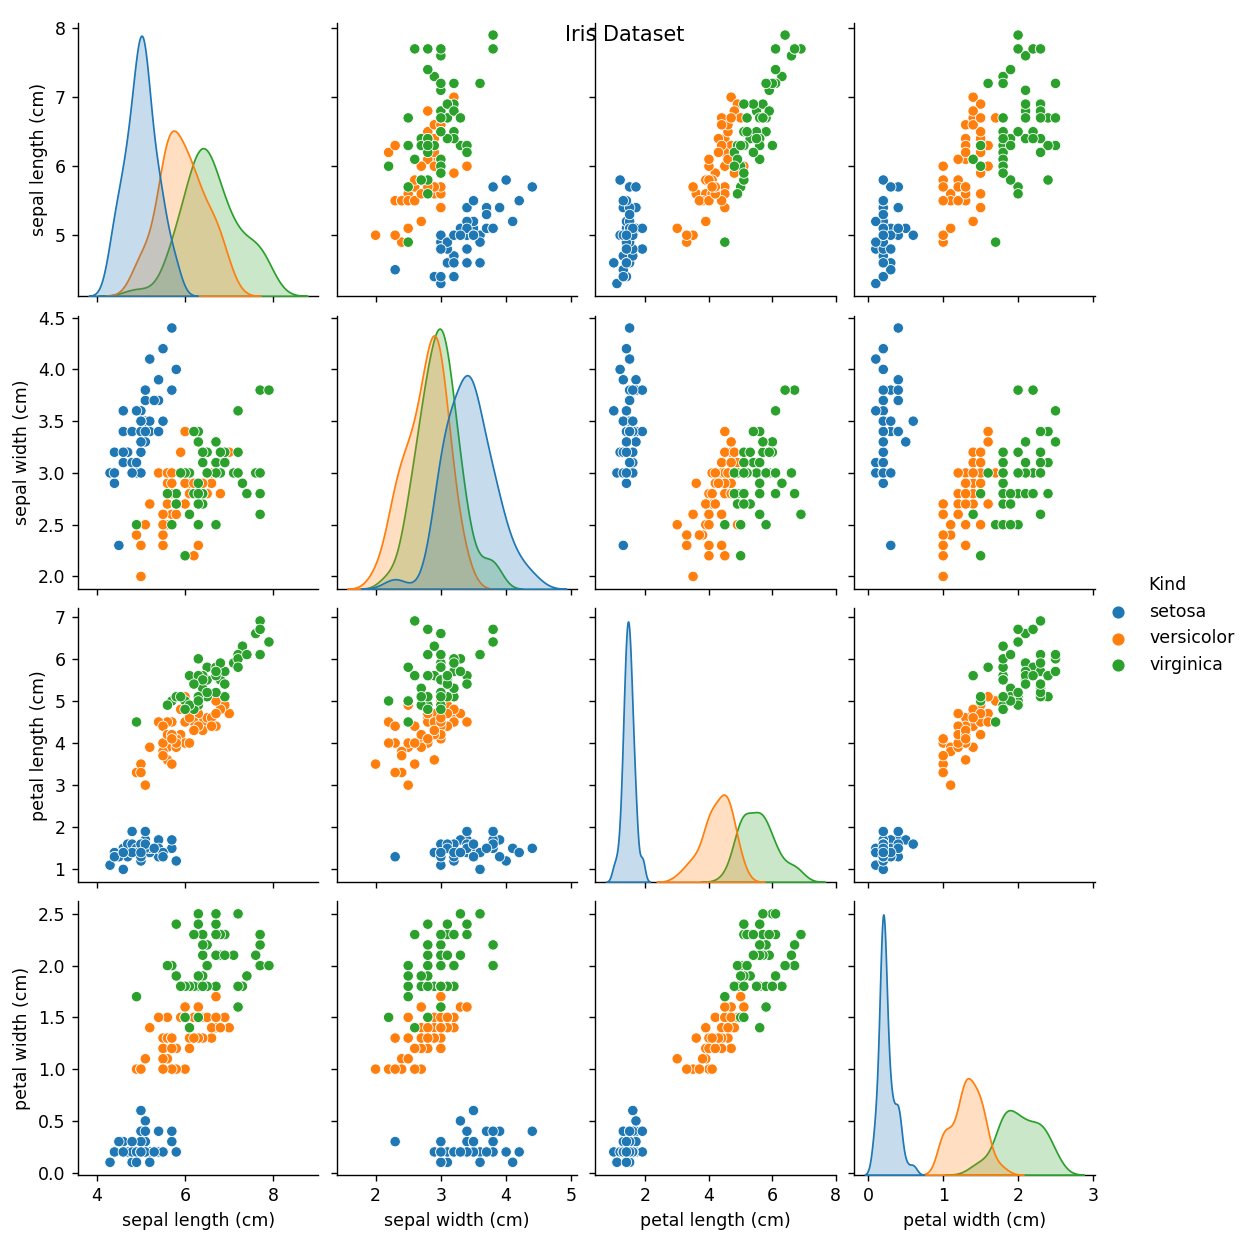

In [4]:
plot = sns.pairplot(df, hue='Kind')
plot.fig.suptitle("Iris Dataset")
plot.fig.set_size_inches(10,10)

### We want to perform dimensionality reduction on the iris dataset.

# PCA Class

In [8]:
class PCA:
    def __init__(self, k):
        self.k = k # Number of dimensions to reduce to. Note that k < n
        
    def fit(self, X):
        m,n = X.shape
        k = 3 # Diemsionality reduction from 4D to 3D 
        Σ = X.T @ X # Covariance matrix
        
        # Compute the SVD
        U, S, V = np.linalg.svd(Σ)
        
        # Coordinate transformation matrix to new coordinate system
        U_reduced = U.T[:self.k].T 
        
        # Dimensionally-reduced data
        Z = np.array([np.dot(U_reduced.T, X[i]) for i in range(m)])
        
        return Z

# Dimensionality reduction

In [9]:
dim_reduce = PCA(3)
Z = dim_reduce.fit(X)

df_reduced = pd.DataFrame(np.vstack((Z.T,y)).T, columns = ['PC1', 'PC2','PC3', 'Kind'])

# Replace the target labels with their actual names
for i, kind_i_name in enumerate(iris_classes):
    df_reduced['Kind'].loc[(df_reduced['Kind'] == i)] = kind_i_name

df_reduced.head()

,PC1,PC2,PC3,Kind
0,-5.912747,-2.302033,0.007402,setosa
1,-5.572482,-1.971826,0.244592,setosa
2,-5.446977,-2.095206,0.015029,setosa
3,-5.436459,-1.870382,0.020505,setosa
4,-5.875645,-2.328290,-0.110338,setosa


<IPython.core.display.Javascript object>


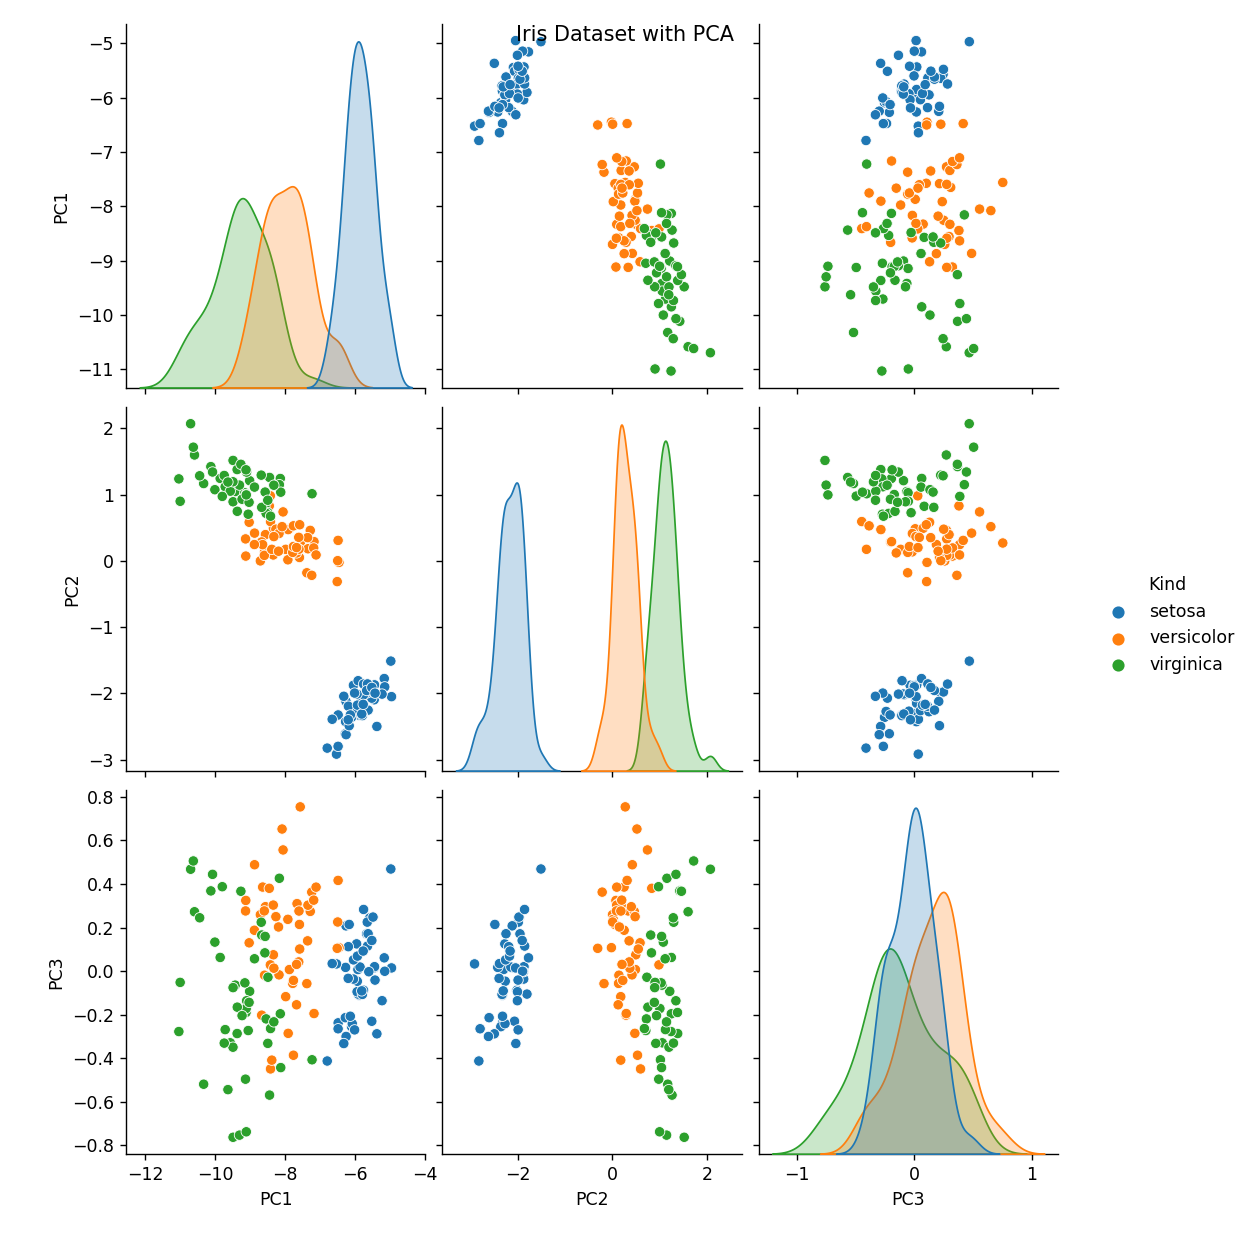

In [10]:
plot_PCA = sns.pairplot(df_reduced, hue='Kind')
plot_PCA.fig.suptitle("Iris Dataset with PCA")
plot_PCA.fig.set_size_inches(10,10)

### We can then use $Z$ as the new training set that we can feed to classification algorithms.